### Mouse Slide-seq SlideCNA

In [1]:
# path_to_results directory that contains outputs from slide-seq_mouse.ipynb
path_to_results <- "path/to/results"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", "spacexr", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

In [3]:
sample <- "200115_08"

In [6]:
# Assumes you're working in the repository root directory
source(glue("code/RCTD.R"))
source(glue("code/utils.R"))

In [7]:
beads_df <- fread(paste0(path_to_results, 'beads_df.csv'))

In [8]:
head(beads_df)

V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,nCount_RNA,cluster_type,bc
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AACGTCATAATCGT,6503,23736,0,0,888.95,3219.5,23736,Malignant,AACGTCATAATCGT
TACTTTAGCGCAGT,5988,19632,0,0,4762.20,5020.4,19632,Malignant,TACTTTAGCGCAGT
CATGCCTGGGTTCG,5303,15982,0,0,886.50,3199.6,15982,Malignant,CATGCCTGGGTTCG
TCGATATGGCACAA,5523,15038,0,0,2237.10,5144.6,15038,Malignant,TCGATATGGCACAA
TTATCTGACGAAGC,4927,13993,0,0,1031.80,2425.2,13993,Normal,TTATCTGACGAAGC
GATGCGACTCCTCG,4345,12712,0,0,5387.00,2291.6,12712,Malignant,GATGCGACTCCTCG


In [6]:
# Uncomment below to use reticulate to set the conda environment

#library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate

In [ ]:
so_adata <- read_h5ad("path/to/Puck.h5ad") # output from slide-seq_prep_mouse.ipynb

In [10]:
so_adata

AnnData object with n_obs <U+00D7> n_vars = 10114 <U+00D7> 15856
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pos_x', 'pos_y', 'nCount_RNA', 'cluster_type', 'bc'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'counts_var'
    obsm: 'counts'

In [11]:
head(rownames(so_adata$var))

[1] "0610007P14Rik" "0610009B22Rik" "0610009E02Rik" "0610009L18Rik"
[5] "0610009O20Rik" "0610010F05Rik"

In [12]:
### Get counts from anndata object. Adjusted this function from utils.R, since adata.uns does not serialize.
get_adata_counts <- function(adata) {
    counts <- adata$obsm$counts %>% 
        t() %>% # transpose
        as.data.frame() %>%
        `rownames<-`(rownames(adata$var)) %>%
        `colnames<-`(adata$obs_names)
    return(counts)
   }

In [13]:
counts <- get_adata_counts(so_adata)

In [14]:
output_directory <- file.path(path_to_results, "SlideCNA")
plot_directory <- file.path(output_directory, "plots")
dir.create(output_directory, showWarnings = FALSE)
dir.create(plot_directory, showWarnings = FALSE)

In [15]:
# Run SlideCNA
library(SlideCNA)


Attaching package: 'SlideCNA'


The following object is masked from 'package:Seurat':

    SpatialPlot


The following object is masked from 'package:base':

    mode




In [17]:
# Read in the gene_position csv that was adapted from inferCNV
gene_pos <- fread(paste0(path_to_results, 'mouse_gencode.GRCm39.vM32.basic.annotation.by_gene_name.infercnv_positions_rel_gene_pos.csv'))
head(gene_pos)

GENE,chr,start,end,rel_gene_pos
<chr>,<chr>,<int>,<int>,<int>
4933401J01Rik,chr1,3143476,3144545,1
Gm26206,chr1,3172239,3172348,2
Xkr4,chr1,3276124,3741721,3
Gm18956,chr1,3322980,3323459,4
Gm37180,chr1,3435954,3438772,5
Gm37363,chr1,3445779,3448011,6


In [ ]:
run_slide_cna(counts, 
              beads_df, 
              gene_pos,
              output_directory,
              plot_directory,
              spatial=TRUE)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Ppp3ca, Hpca, Nrgn, Chn1, Ptk2b, Gria2, Rbfox1, Camk2b, Wipf3, Olfm1 
	   Ppp3r1, Fam131a, Atp2b1, Kalrn, Ncdn, 2010300C02Rik, Ddn, Icam5, Enc1, Dlgap1 
	   Lppr4, Wasf1, Cpne6, Grin2a, Itpka, Neurod2, Slc8a2, Cnksr2, Prkce, Cplx2 
Negative:  Plp1, Enpp2, Apoe, Dbi, Cd63, Ptgds, Zic1, Apod, Trf, Cnp 
	   Ccdc153, Mal, Tppp3, Cldn11, Calml4, 1500015O10Rik, Mbp, Pltp, Rsph1, Mag 
	   Car2, Rarres2, Mog, Tmem212, Neat1, Gm5741, Mobp, Cryab, Tac2, Pla2g16 
PC_ 2 
Positive:  Cldn11, Mag, Mal, Mog, Ermn, Trf, Cnp, Tmem88b, Plp1, Mobp 
	   Gatm, Sept4, Mbp, Tspan2, Ugt8a, Opalin, Gjc3, Cryab, Apod, Ndrg1 
	   Gpr37, Gjc2, Car2, Qdpr, Qk, Pllp, Il33, Aspa, Tmem63a, Olig1 
Negative:  Ccdc153, Rsph1, Tmem212, Rarres2, Calml4, 1500015O10Rik, Nwd2, Tac2, Gm5741, Ak7 
	   Nnat, 2410004P03Rik, Enkur, Pltp, Dynlrb2, Drc7, Lrrc23, 1700012B09Rik, 1110017D15Rik, Cfap126 
	   Scube1, Fam183b, Tm4sf1, Mlf1, Hdc, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10114
Number of edges: 340452

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8842
Number of communities: 16
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
02:52:41 UMAP embedding parameters a = 0.9922 b = 1.112

02:52:41 Read 10114 rows and found 10 numeric columns

02:52:41 Using Annoy for neighbor search, n_neighbors = 30

02:52:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:52:42 Writing NN index file to temp file /local/scratch/48044499.1.interactive/RtmpcgkXBC/file38ae420cea95

02:52:42 Searching Annoy index using 1 thread, search_k = 3000

02:52:45 Annoy recall = 100%

02:52:45 Commencing smooth kNN distance calibration using 1

#### Analyze Seurat Object of Slide-seq data

In [9]:
so <- readRDS(file=file.path(output_directory, "so.rds"))
md <- read.table(file=file.path(output_directory, "md_bin.txt"))

In [10]:
head(so)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,cluster_type,bc
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AACGTCATAATCGT,SeuratProject,23736,6503,0,11,11,AACGTCATAATCGT,6503,23736,0,0,888.95,3219.5,Malignant,AACGTCATAATCGT
TACTTTAGCGCAGT,SeuratProject,19632,5988,0,11,11,TACTTTAGCGCAGT,5988,19632,0,0,4762.20,5020.4,Malignant,TACTTTAGCGCAGT
CATGCCTGGGTTCG,SeuratProject,15982,5303,0,11,11,CATGCCTGGGTTCG,5303,15982,0,0,886.50,3199.6,Malignant,CATGCCTGGGTTCG
TCGATATGGCACAA,SeuratProject,15038,5523,0,11,11,TCGATATGGCACAA,5523,15038,0,0,2237.10,5144.6,Malignant,TCGATATGGCACAA
TTATCTGACGAAGC,SeuratProject,13993,4927,0,11,11,TTATCTGACGAAGC,4927,13993,0,0,1031.80,2425.2,Normal,TTATCTGACGAAGC
GATGCGACTCCTCG,SeuratProject,12712,4345,0,5,5,GATGCGACTCCTCG,4345,12712,0,0,5387.00,2291.6,Malignant,GATGCGACTCCTCG
ACGGATGTTCCGAT,SeuratProject,10424,3656,0,13,13,ACGGATGTTCCGAT,3656,10424,0,0,3760.30,4171.7,Malignant,ACGGATGTTCCGAT
TCTCATGGGTGGGA,SeuratProject,10761,3874,0,13,13,TCTCATGGGTGGGA,3874,10761,0,0,1007.90,3523.8,Normal,TCTCATGGGTGGGA
ACCGGAACTTCTTC,SeuratProject,9739,4328,0,12,12,ACCGGAACTTCTTC,4328,9739,0,0,3259.40,1233.7,Malignant,ACCGGAACTTCTTC


In [11]:
# TSNE Plots

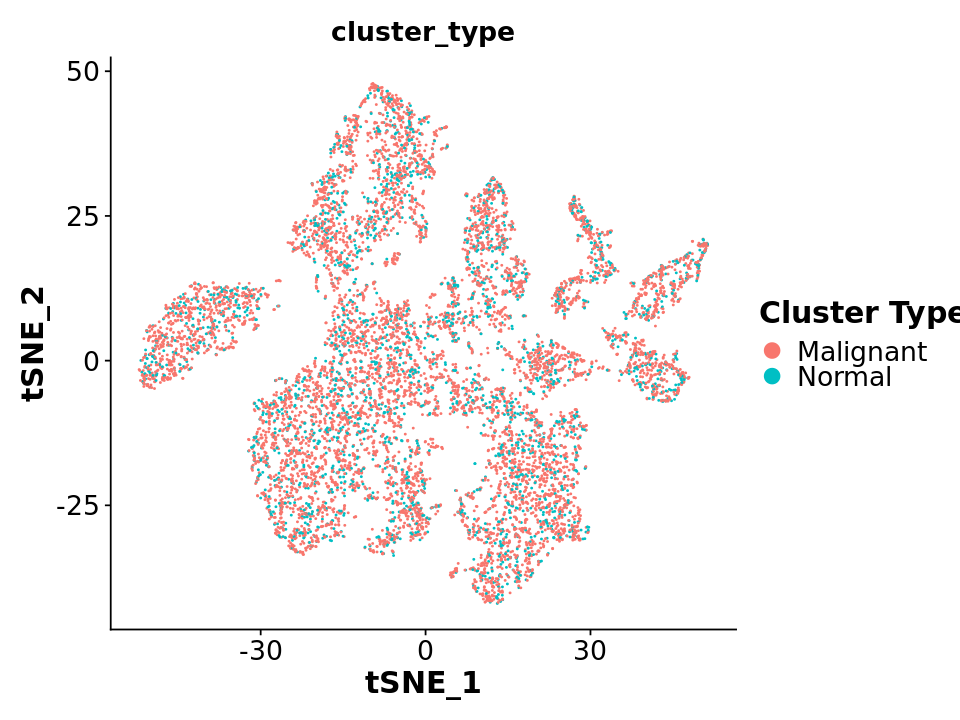

In [24]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(so, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

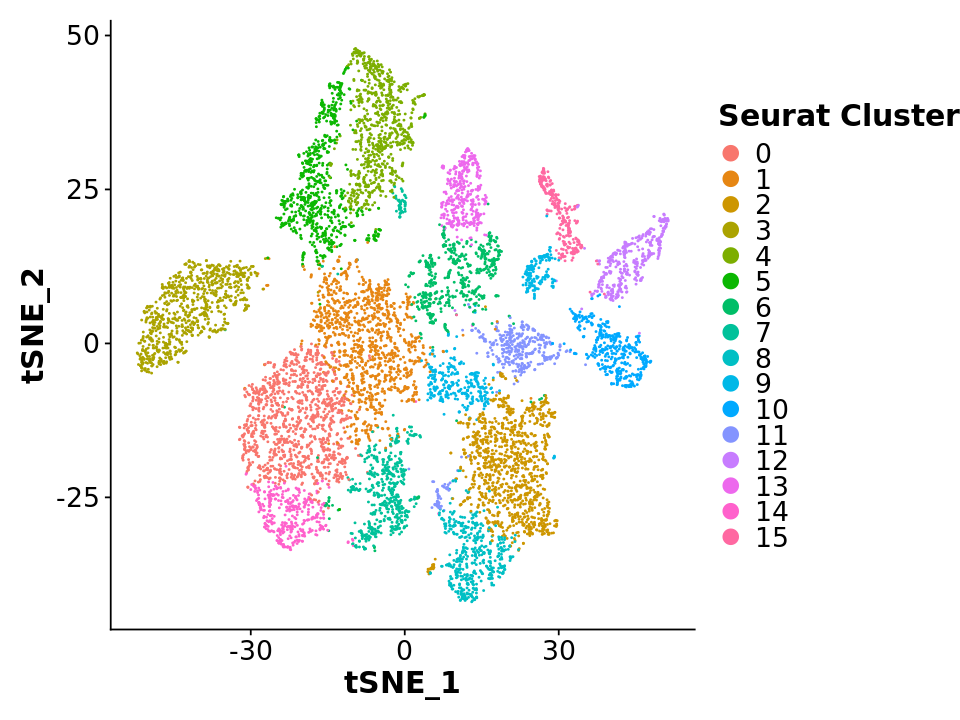

In [25]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(so, label.size = 18) +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

In [26]:
# Spatial plots

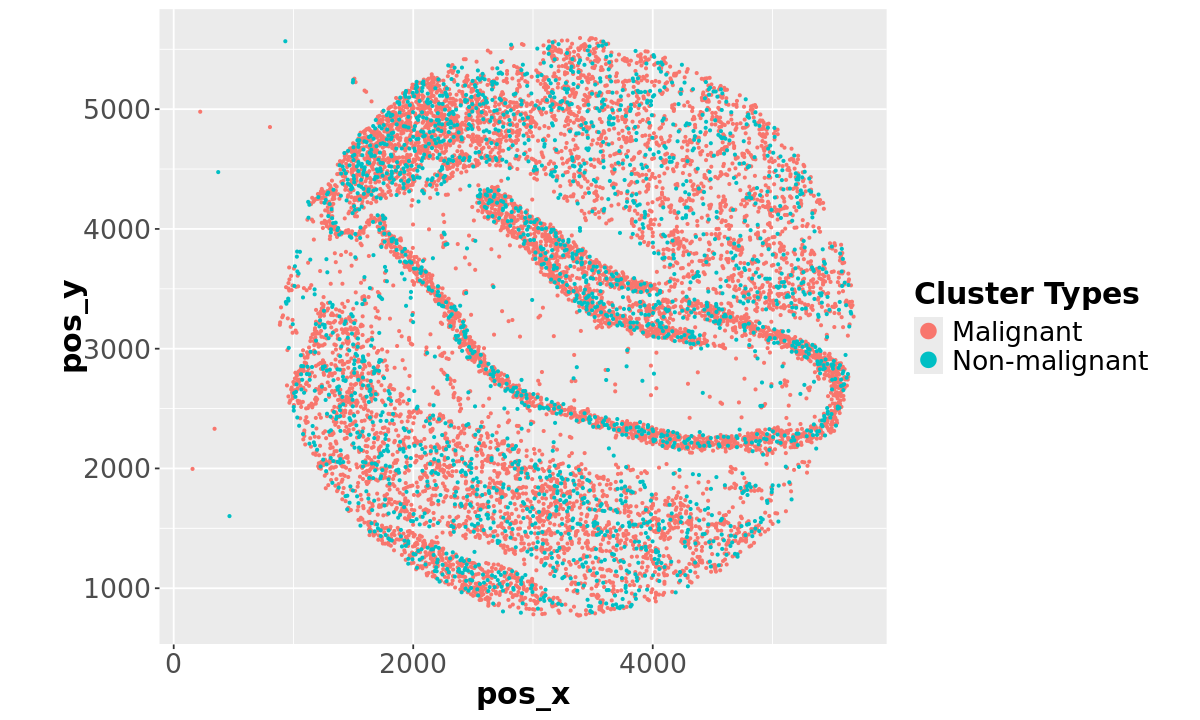

In [27]:
legend_title = "Cluster Types"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=(cluster_type)))+geom_point(size=0.5, position="jitter")+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

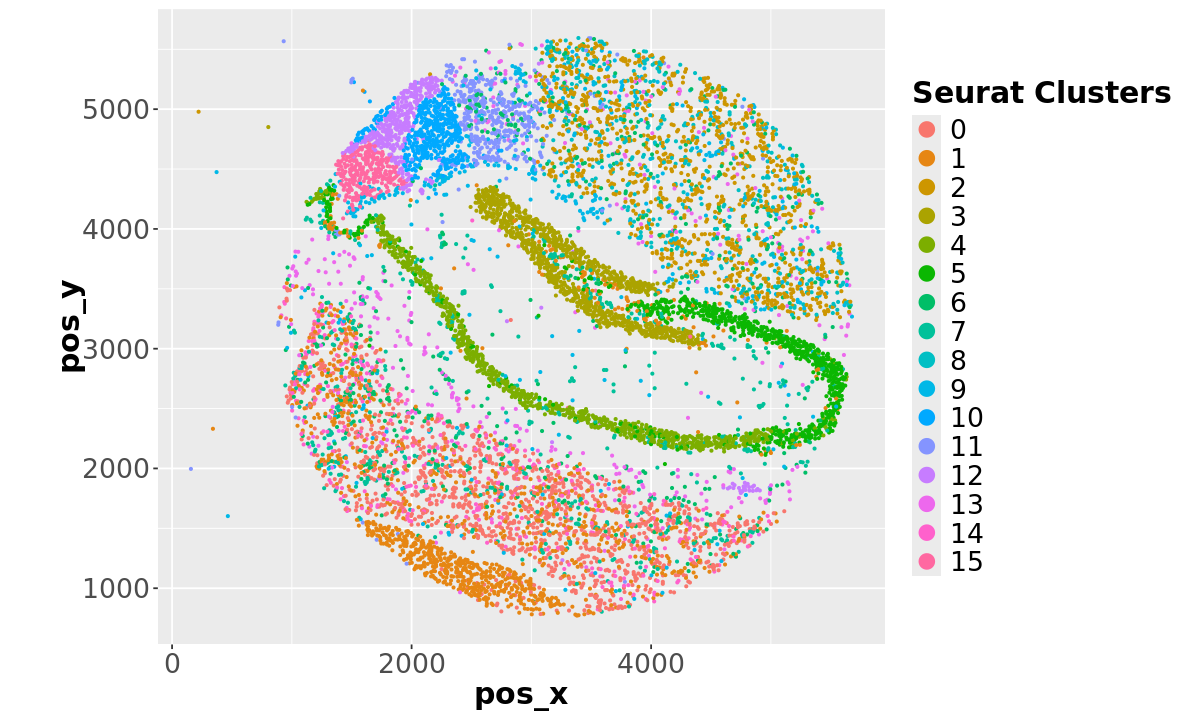

In [28]:
legend_title = "Seurat Clusters"
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.5)+coord_fixed() +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

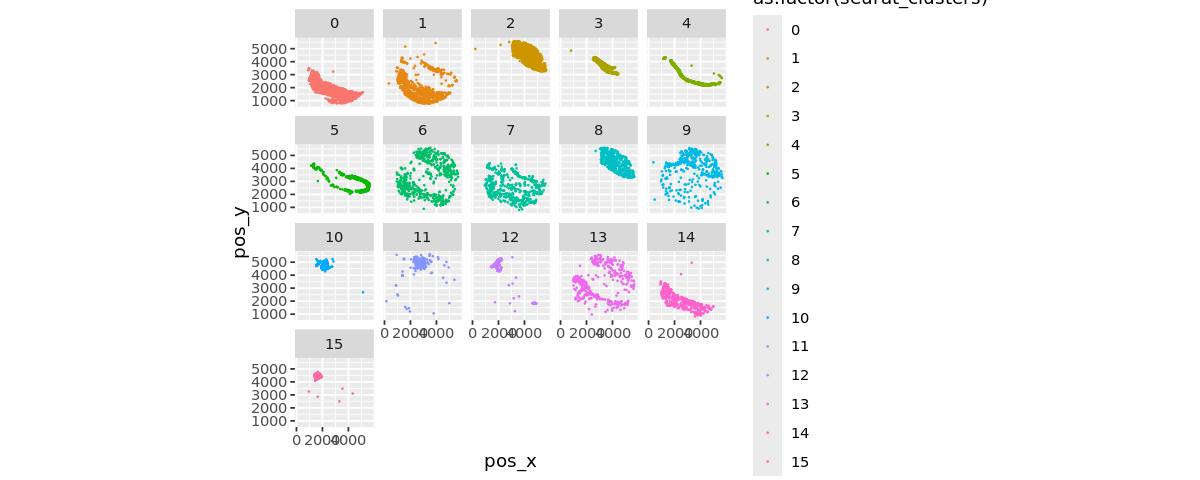

In [29]:
options(repr.plot.width = 10, repr.plot.height =4)
ggplot(md,aes(x=pos_x,y=pos_y,col=as.factor(seurat_clusters)))+geom_point(size=0.1)+coord_fixed()+facet_wrap(~seurat_clusters,ncol=5)